## Text Column Distributions

In [ ]:
from os import walk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import load_pickle, split_groupby

def len_func(x):
    splitted = x.split()
    return len(splitted)

def print_dist(df, column_name, binwidth, column_name_2):
    tot_rows = df.count()
    title_df = df[[column_name]]
    title_df['len'] = df[column_name].apply(len_func)
    title_lengths = title_df['len'].tolist()
    if max(title_lengths) > 1400: max_width = 800
    else: max_width = max(title_lengths)
    mean = np.mean(title_lengths)
    n, bins, patches = plt.hist(title_lengths, bins=np.arange(min(title_lengths), max_width + binwidth, binwidth))
    plt.title(f"{column_name_2} - Distribution of word count\nMean: {round(mean,0)}")
    plt.xlabel('Word Count', fontsize=12)
    plt.ylabel('Count Data Points', fontsize=12)
    plt.show()

reviews_pandas_filename = "./data_processed/"

filenames = next(walk(reviews_pandas_filename), (None, None, []))[2]
dfs = []
for file in filenames:
    dfs.append(load_pickle(reviews_pandas_filename + file))
df = pd.concat(dfs)

split_ratio = 0.15
reduced = None
verbose = True

train, val, test = split_groupby(df, split_ratio, 'qid', reduced, verbose)

In [2]:
print("Size of total data: ", len(df))
print("Size of traing data: ", len(train))
print("Size of validation data: ", len(val))
print("Size of testing data: ", len(test))


Size of total data:  94823
Size of traing data:  80268
Size of validation data:  7633
Size of testing data:  6922


C:\Users\simen\AppData\Local\Temp\ipykernel_27004\621427020.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_df['len'] = df[column_name].apply(len_func)


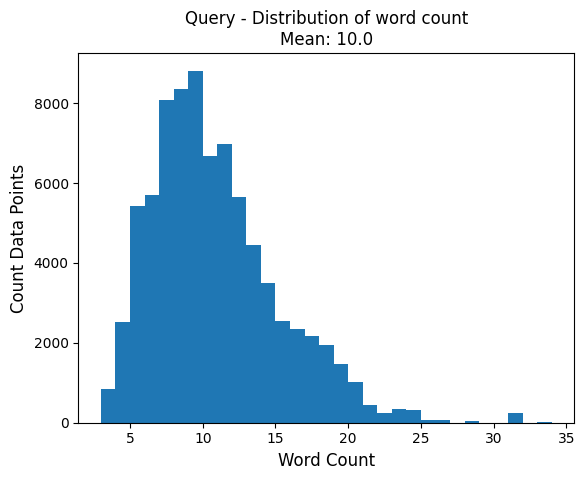

C:\Users\simen\AppData\Local\Temp\ipykernel_27004\621427020.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_df['len'] = df[column_name].apply(len_func)


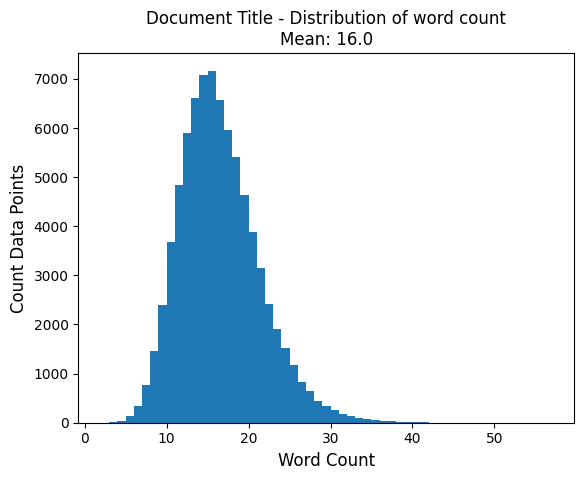

C:\Users\simen\AppData\Local\Temp\ipykernel_27004\621427020.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_df['len'] = df[column_name].apply(len_func)


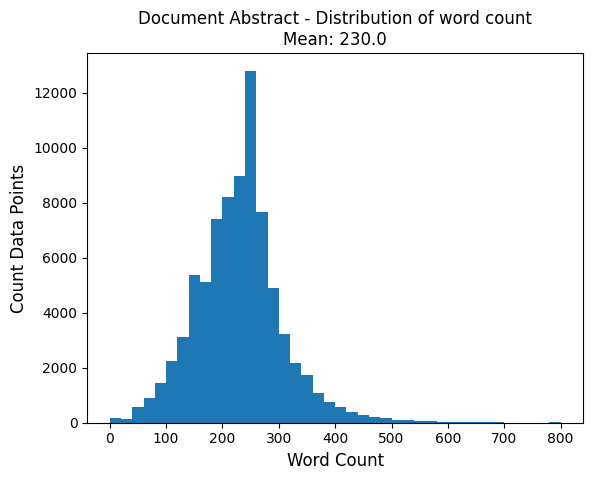

In [4]:
print_dist(train, 'title', 1, 'Query')
print_dist(train, 'study_title', 1, 'Document Title')
print_dist(train, 'study_abstract', 20, 'Document Abstract')

In [ ]:
def count_words(sentence):
    return len(sentence.split())

train["title_count"] = train["title"].apply(count_words)
train["study_title_count"] = train["study_title"].apply(count_words)
train["abstract_count"] = train["study_abstract"].apply(count_words)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\simen\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


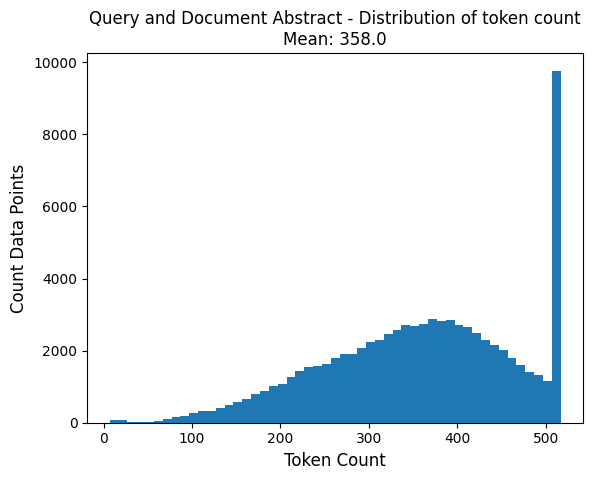

c:\Users\simen\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


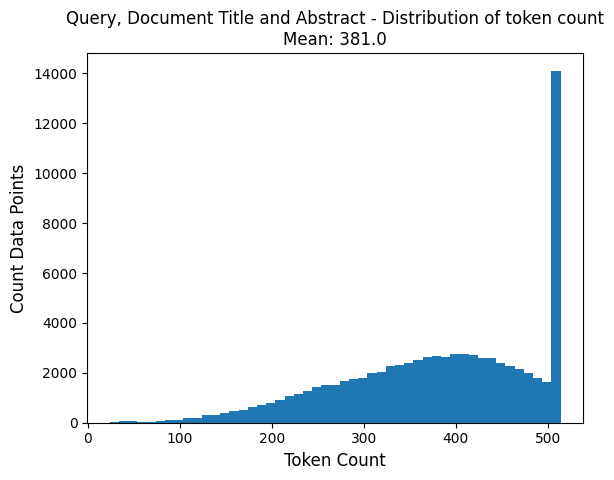

In [6]:
from utils import preprocess_df_bert_2_4
from utils import get_tokenizer

tokenizer = get_tokenizer(None, 'prajjwal1/bert-tiny')

def get_token_len(ids):
    counter = 0
    for item in ids:
        if item != 0:
            counter += 1
        else:
            return counter
    return counter

def count_tokenize(text):
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,
        return_token_type_ids=True,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    encoding_output = encoding['input_ids']
    encoding_length = get_token_len(encoding_output[0])
    return encoding_length

def print_tokenize(text_columns, title, train):
    df_processed = preprocess_df_bert_2_4(train, text_columns, False, None, 'text')
    df_processed['tokenizing_len'] = df_processed['text'].apply(count_tokenize)
    binwidth = 10
    token_lengths = df_processed['tokenizing_len'].tolist()
    if max(token_lengths) < 100: max_width = 100
    elif max(token_lengths) < 200: max_width = 200
    elif max(token_lengths) > 1400: max_width = 800
    else: max_width = max(token_lengths)
    mean = np.mean(token_lengths)
    n, bins, patches = plt.hist(token_lengths, bins=np.arange(min(token_lengths), max_width + binwidth, binwidth))
    plt.title(f"{title} - Distribution of token count\nMean: {round(mean,0)}")
    plt.xlabel('Token Count', fontsize=12)
    plt.ylabel('Count Data Points', fontsize=12)
    plt.show()
    return token_lengths

token_lengths4 = print_tokenize("title study_abstract", "Query and Document Abstract", train)
token_lengths5 = print_tokenize("title study_title study_abstract", "Query, Document Title and Abstract", train)


In [7]:
def get_percantage_above_512(tokens):
    return round(sum(i >= 512 for i in tokens) / len(tokens) * 100, 0)
print("Query and Document abstract - Percentage of datapoints where count tokens exceed 512: ", get_percantage_above_512(token_lengths4))
print("Query, Document Title and Abstract - Percentage of datapoints where count tokens exceed 512: ", get_percantage_above_512(token_lengths5))

Query and Document abstract - Percentage of datapoints where count tokens exceed 512:  12.0
Query, Document Title and Abstract - Percentage of datapoints where count tokens exceed 512:  16.0


Text(0, 0.5, 'Count Data Points')

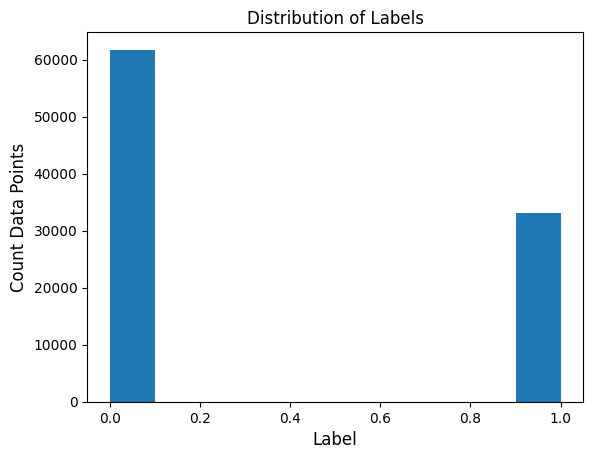

In [8]:
labels = df['label'].tolist()
plt.hist(labels)
plt.title(f"Distribution of Labels")
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count Data Points', fontsize=12)

In [9]:
percentage = df['label'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
percentage

0    65.1%
1    34.9%
Name: label, dtype: object

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<WordListCorpusReader in 'C:\\Users\\simen\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [17]:
stopword_list = [w for w in stopwords.words('english')]

In [18]:
len(stopword_list)

179

In [19]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each